<a href="https://colab.research.google.com/github/prashantiyaramareddy/MyPython-Stuff/blob/master/Pytorch%5C4_Pytorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch Custom Datasets

## 0. Importing Pytorch and setting up device agnostic code

In [163]:
import torch
from torch import nn

torch.__version__

'2.8.0+cu126'

In [164]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [165]:
!nvidia-smi

Wed Sep 24 06:48:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----



```
# This is formatted as code
```

## 1. Get Data

Our dataset is a subset of the food 101 dataset. Food101 starts 101 different classes of food and 1000 images per class (750 training and 250 testing)

Our dataset starts with 3 classes of food and only 10% of images(75 training images and 25 testing)

When starting our ML projects , it's important to try things on a small scale and then increase the scale when necessary

In [166]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating {image_path} directory")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data")
    f.write(request.content)

data/pizza_steak_sushi directory already exists


In [167]:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data")
    zip_ref.extractall(image_path)

Unzipping pizza, steak and sushi data


## 2. Becoming one with data

In [168]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'


In [169]:
# Set up train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing and image

Let's write some code :

1. Get all image paths.
2. Pick a random image patch using Python's random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we are working with images, let's open the image with Python's PIL
5. We will show the image and print metadata


In [170]:
image_path

PosixPath('data/pizza_steak_sushi')

In [171]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2330965.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3196721.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2811032.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/786995.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2382016.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/244505.jpg')]

In [172]:
# 2.  Pick a random image path
random_image_path = random.choice(image_path_list)

random_image_path

PosixPath('data/pizza_steak_sushi/train/pizza/741883.jpg')

In [173]:
#3. Get the image class from the path name
image_class = random_image_path.parent.stem
image_class

'pizza'

Random image path: data/pizza_steak_sushi/train/pizza/741883.jpg
Image class: pizza
Image height: 512
Image width: 512


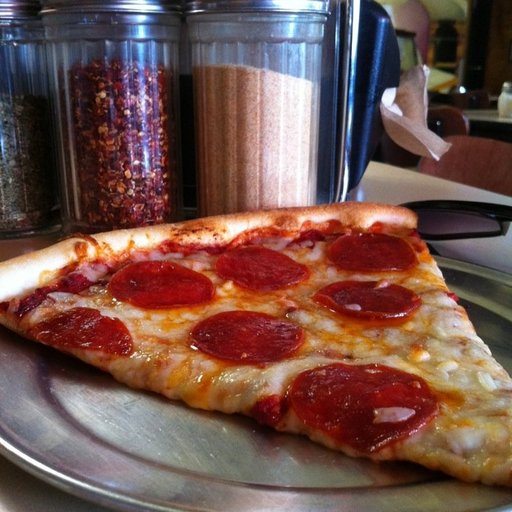

In [174]:
# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

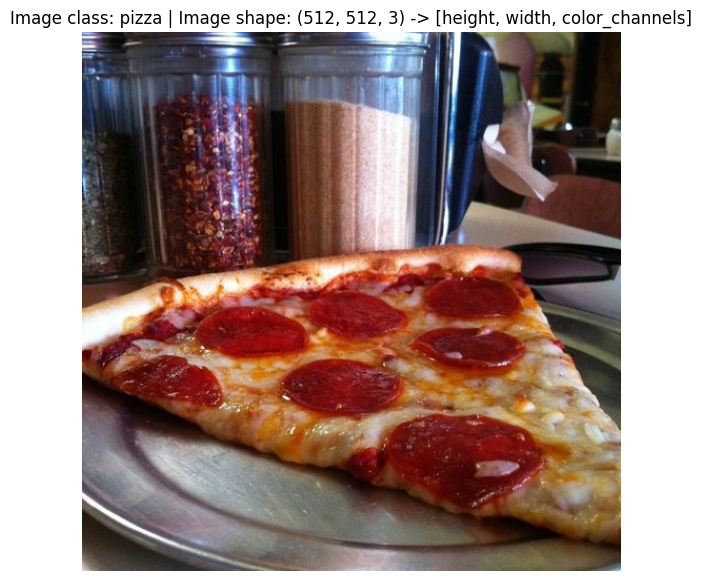

In [175]:
# Try to visualize image using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.array(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)